<a href="https://colab.research.google.com/github/bingsen-wang/Python-Examples/blob/main/ColorHarmony_triadic_SaturationBrightness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Color Scheme: Triadic Colors with Varying Saturation and Brightness
</h1></b>

Dr. Bingsen Wang

1/9/2024
</center>

#Python Code
The Python code illustrates the principle of additive colors.

0
0
1
2
3
4
5
6
7
0


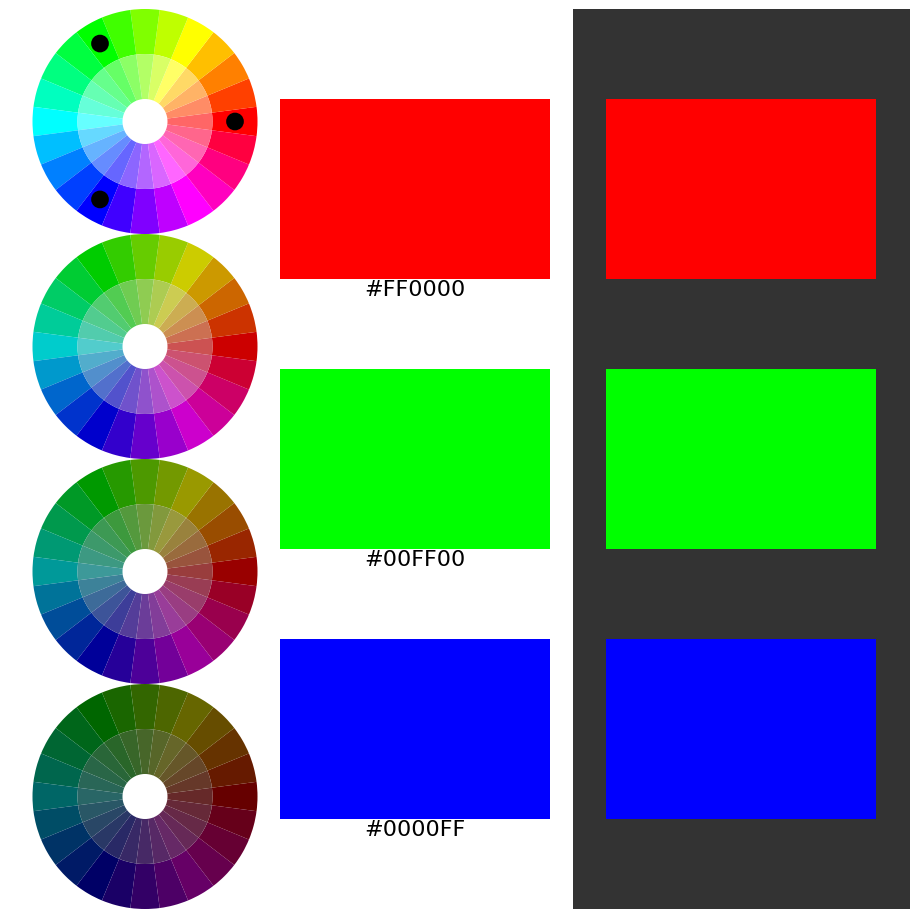

In [43]:
from os import linesep
from colorsys import hsv_to_rgb
import shapely.geometry as sg
import numpy as np
from numpy import linspace,cos,sin,pi,deg2rad
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc,colors
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def rgb2hex(rgb):
  return "#%02X%02X%02X" % (round(rgb[0]*255),round(rgb[1]*255),round(rgb[2]*255))

def colorPatches(ax,xy, wh,colors):
  for i in range(len(colors)):
    yi = xy[1]-(wh[1] + .1)*i
    rect1 = mp.Rectangle((xy[0],yi),wh[0],wh[1],fc=colors[i])
    rect2 = mp.Rectangle((xy[0]+wh[0]+.0625,yi),wh[0],wh[1],fc=colors[i])
    # sq = mp.Rectangle((xy[0]+wh[0]+.05,yi),wh[1],wh[1],ec=colors[i],fc='none',lw=4)
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    # ax.add_patch(sq)
    ax.text(xy[0]+wh[0]*.5,yi,rgb2hex(colors[i]),size=16,ha='center',va='top')
  return

#s: saturation; v: brightness; n: number of colors; w: ro-ri of wedge
def colorwheel(ax,xy,ro,w,s,v,n):
  theta = 360/n
  for i in range(n):
    ax.add_patch(mp.Wedge(xy,ro,theta*(i-.5),theta*(i+.5),
                          width=w,fc=hsv_to_rgb(i*theta/360,s,v)))
  return

def threeCircles(ax,xy,r,rc,theta):
  for i in range(3):
    x = xy[0]+ rc*cos(theta+2*pi/3*i)
    y = xy[1]+ rc*sin(theta+2*pi/3*i)
    ax.add_patch(mp.Circle((x,y),radius=r,lw=3,fc='k',ec='k'))
  return


#parameters
Nf = 8
t=linspace(0,1,Nf)
w = .3  #width of the rectangle
h = .2 #height of the retangle
ro = .125 #radius of color wheel
ww = .4*ro #width of the rings in colorwheel
nc = 24 #number of colors
theta_c = 360/nc #spanning angle of each color

s = [1,.6] #saturation levels in each colorwheel
v = linspace(1,.4,4) #brightness level for each color wheel
c_bg = hsv_to_rgb(0,0,1)

#set up figures
fig = plt.figure(figsize=(9,9))
ax_frame = [[0, 0, 1, 1], [0,1], [0,1]]# [pos-boundary, xlim, ylim]
xn,xm,yn,ym = ax_frame[1]+ax_frame[2]
ax1=fig.add_axes(ax_frame[0],xlim=ax_frame[1], ylim=ax_frame[2],fc='none') #no face color
ax=fig.add_axes(ax_frame[0],xlim=ax_frame[1], ylim=ax_frame[2],fc='none') #no face color
ax.axis('off')
ax1.axis('off')

# animation function. This is called sequentially
def animate(i):
  ii = i%Nf
  k = i//Nf
  if ii==0:
    print(k) #for monitoring
  ax.clear()
  ax.axis('off')
  ax.set_xlim(xn,xm)
  ax.set_ylim(yn,ym)
  c1 = hsv_to_rgb(ii*theta_c/360,      s[k%2], v[k//2]) #red - green
  c2 = hsv_to_rgb((ii*theta_c+120)/360,s[k%2], v[k//2]) #green -blue
  c3 = hsv_to_rgb((ii*theta_c+240)/360,s[k%2], v[k//2]) #blue -red
  clst_triad=[c1,c2,c3]
  colorPatches(ax, (.3,.7),(w,h),clst_triad)
  threeCircles(ax,(.15,1-ro - 2*ro*(k//2)),.0075,ro-ww*(.5+k%2),ii*2*pi/3/Nf)
  return

for i in range(4):
  colorwheel(ax1,(.15,1-ro*(2*i+1)),ro,ro*.4,s[0],v[i],nc)
  colorwheel(ax1,(.15,1-ro*(2*i+1)),ro*.6,ro*.4,s[1],v[i],nc)
ax1.add_patch(mp.Rectangle((.625,0),.375,1,fc=(.2,.2,.2),ec='none'))
anim = animation.FuncAnimation(fig, animate, frames=Nf*8, interval=100)
# anim #uncomment to generate animation in the output area
anim.save("colorHarmony_triad64.mp4", fps=2, dpi = 120) #uncomment to save